#### Exercise 1: Load and save numpy array from memory to disk.
#### Exercise 2: Implement an image filter using numpy array manipulation
#### Exercise 3: Implement 2d rotation of image using numpy
#### Exercise 4: Review the important concepts and do some challenges in each section

# Load and save numpy array from memory to disk

In [34]:
import numpy as np
import pandas as pd 

# creatinh th e araay in the memory
my_array = np.array([[1, 2, 3],
                     [4, 5, 6],
                     [7, 8, 9]])

print("Original Array:")
print(my_array)

# saving in the disk as .npy fike
np.save('my_array.npy', my_array)

# loading the array from the disk
loaded_array = np.load('my_array.npy')
print("loaded Array:")
print(loaded_array)

# verify if they are same or not
are_same = np.array_equal(my_array, loaded_array)
print(f"are they same? {are_same}")


Original Array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
loaded Array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
are they same? True


# implement the image gilter using numpy array manipulation

Displaying the image:


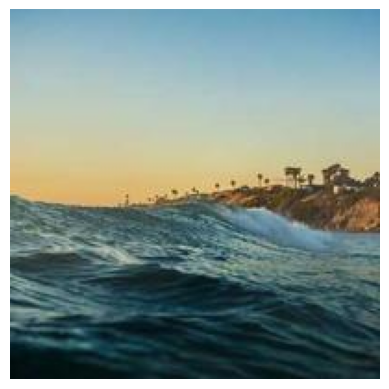

(200, 200, 3)


In [35]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

url = "https://picsum.photos/200"
response = requests.get(url)
image = Image.open(BytesIO(response.content))   

# converting image to numpy array
image_array = np.array(image)

# Display using matplotlib
print("Displaying the image:")
plt.imshow(image_array)
plt.axis('off')  # hide axes
plt.show()

print(image_array.shape)


Applying filter to the image:
Grayscale Image:


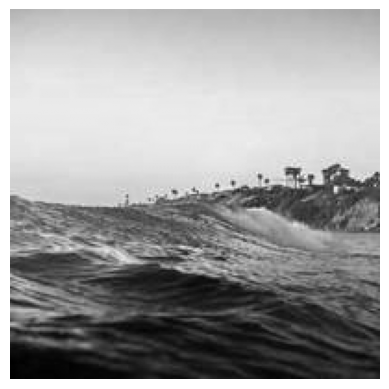

Inverted Image:


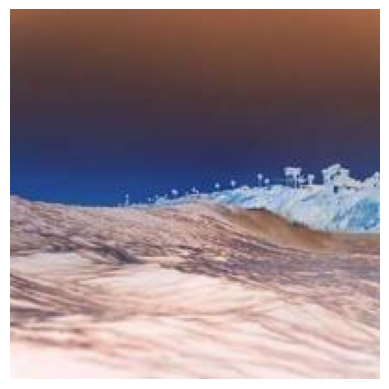

Brightened Image:


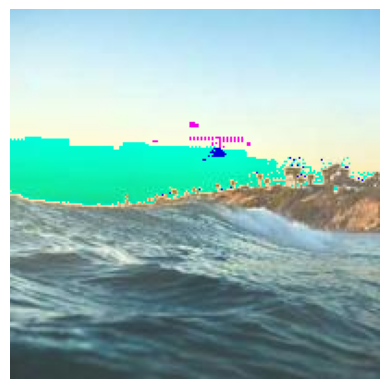

In [36]:
# implementing fileter
print("Applying filter to the image:")

# Grayscale
print("Grayscale Image:")
gray = np.mean(image_array, axis=2)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

# Inverted
print("Inverted Image:")
inverted = 255 - image_array
plt.imshow(inverted)
plt.axis('off')
plt.show()

# Brightened
print("Brightened Image:")
brightened = np.clip(image_array + 50, 0, 255)
plt.imshow(brightened.astype(np.uint8))
plt.axis('off')
plt.show()


# Rotate 2d

(200, 200, 3)
height: 200, width: 200


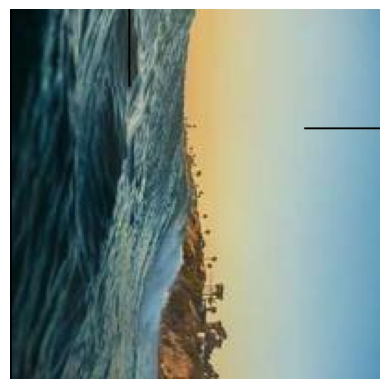

In [37]:
angle = 90
theta = np.radians(angle)

print(image_array.shape)
height, width = image_array.shape[:2]
print(f"height: {height}, width: {width}")

rotated = np.zeros_like(image_array)
# image center
cx, cy = width // 2, height // 2
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)

for i in range(height):
    for j in range(width):
        # coordinates relative to center
        x = j - cx
        y = i - cy
        # rotated coordinates
        x_rot = int(cos_theta * x - sin_theta * y + cx)
        y_rot = int(sin_theta * x + cos_theta * y + cy)
        # check bounds
        if 0 <= x_rot < width and 0 <= y_rot < height:
            rotated[y_rot, x_rot] = image_array[i, j]

plt.imshow(rotated)
plt.axis('off')
plt.show()
